### **Introduction**
In this project, I analyzed Charles Darwin's use of persuasive language in his seminal work, On the Origin of Species. My objective was to explore how Darwin employs different rhetorical techniques—such as evidence-based arguments, emphasis, and refutation—to build his case for natural selection. By systematically examining the frequency and distribution of specific persuasive terms across the chapters, I aimed to understand the patterns and strategies Darwin used to communicate his revolutionary ideas.

To achieve this, I first imported the text of the book and prepared it for analysis by cleaning and standardizing the content. I identified key persuasive terms in three categories: evidence (e.g., "evidence," "proof"), emphasis (e.g., "clearly," "certainly"), and refutation (e.g., "however," "but"). I then counted the occurrences of these terms in each chapter to understand how Darwin structured his arguments.

To fulfill the project objective of practicing text processing, I applied several techniques, including text extraction, case normalization, regular expression matching, and frequency analysis. These methods allowed me to effectively manipulate and analyze the text data, demonstrating essential skills in text processing, such as data cleaning, term frequency calculation, and ratio analysis. The project provided hands-on experience in processing and analyzing large textual datasets, helping to refine my understanding of text processing workflows and tools.

By calculating the ratios of these terms within each chapter, I explored various potentials:

Identifying Dominant Persuasive Strategies: Understanding which type of persuasive language (evidence, emphasis, or refutation) Darwin relies on most heavily in different parts of his text.
Exploring Patterns Across Chapters: Discovering whether there are chapters where Darwin introduces new ideas using evidence-based terms, emphasizes key points, or predominantly addresses counterarguments.
Assessing Variations in Rhetorical Style: Observing how the balance of these persuasive strategies shifts throughout the book, potentially indicating different phases of argumentation or changes in his communication style.
This analysis not only provides insights into Darwin's rhetorical methods but also offers a model for studying persuasive language in scientific literature, revealing how authors use different strategies to engage readers, build credibility, and address opposing viewpoints.

### **Loading the Text File**

To begin, we specify the path to the text file containing *On the Origin of Species* and open it in read mode using Python. The purpose of this step is to read the entire content of the text into a variable, allowing us to perform subsequent processing and analysis. The `encoding='utf-8'` parameter is used to handle any special characters in the document, ensuring the text is read correctly. This step sets up the raw data needed for further analysis.


In [84]:
# Updated path to the text file
file_path = '/Users/steventuschman/Desktop/Text_Processing_Practice/On the Origin of Species.txt'

# Open the file and read its contents
with open(file_path, 'r', encoding='utf-8') as file:
    text = file.read()


### **Extracting and Cleaning the Text Content**

In this step, we identify the starting point of the actual content by searching for a specific phrase ("When on board H.M.S. ‘Beagle,’ as naturalist,") and extracting the text from that point onward. The extracted text is converted to lowercase to standardize the format for analysis. We then remove any punctuation and special characters using regular expressions, ensuring that the text is clean and ready for processing. Finally, we display the first 500 characters of the cleaned text to verify the content and confirm that the extraction and cleaning processes were successful.


In [85]:
# Find the start of the actual content
start_content = text.find("When on board H.M.S. ‘Beagle,’ as naturalist,")  # Example keyword; change as needed

# Extract the content starting from the identified point
book_content = text[start_content:]

# Convert to lowercase
book_content = book_content.lower()

# Remove punctuation and special characters using regular expressions
import re
book_content_clean = re.sub(r'[^\w\s]', '', book_content)

# Display the first 500 characters of the cleaned content to verify
print(book_content_clean[:500])


when on board hms beagle as naturalist i was much struck with
certain facts in the distribution of the inhabitants of south america
and in the geological relations of the present to the past inhabitants
of that continent these facts seemed to me to throw some light on the
origin of speciesthat mystery of mysteries as it has been called by
one of our greatest philosophers on my return home it occurred to me
in 1837 that something might perhaps be made out on this question by
patiently accumulatin


### **Defining and Counting Persuasive Terms**

In this step, we define a list of persuasive terms grouped into three categories: **evidence** (e.g., "evidence," "proof"), **emphasis** (e.g., "clearly," "certainly"), and **refutation** (e.g., "however," "but"). A dictionary is created to store the frequency of each term within these categories. We use regular expressions to count the occurrences of each term in the cleaned text. The results are then displayed, showing how often each persuasive term appears throughout the text. This helps us understand Darwin's use of different rhetorical techniques in his writing.


In [86]:
# Define the list of persuasive terms grouped by category
persuasive_terms = {
    'evidence': ['evidence', 'proof', 'demonstrate', 'experiment', 'observation', 'fact'],
    'emphasis': ['clearly', 'certainly', 'undoubtedly', 'without a doubt', 'obviously'],
    'refutation': ['however', 'nevertheless', 'on the contrary', 'yet', 'but', 'despite']
}

# Dictionary to store term frequencies
term_frequencies = {category: {term: 0 for term in terms} for category, terms in persuasive_terms.items()}

# Count occurrences of each term using regular expressions
for category, terms in persuasive_terms.items():
    for term in terms:
        term_frequencies[category][term] = len(re.findall(r'\b' + term + r'\b', book_content_clean))

# Display the term frequencies
for category, terms in term_frequencies.items():
    print(f"\n{category.capitalize()} Terms:")
    for term, count in terms.items():
        print(f"{term}: {count}")



Evidence Terms:
evidence: 65
proof: 5
demonstrate: 0
experiment: 14
observation: 3
fact: 134

Emphasis Terms:
clearly: 43
certainly: 63
undoubtedly: 14
without a doubt: 0
obviously: 5

Refutation Terms:
however: 83
nevertheless: 35
on the contrary: 1
yet: 199
but: 856
despite: 1


### **Analyzing Persuasive Terms by Chapter**

In this step, we split the cleaned text into chapters using regular expressions to identify chapter headings. This allows us to analyze the frequency of each persuasive term within individual chapters. We initialize a dictionary to store the term frequencies for each category (evidence, emphasis, and refutation) and iterate through each chapter to count occurrences of these terms using regular expressions. The term frequencies by chapter are printed to verify the distribution of persuasive language throughout the text. This analysis helps us understand the variation in Darwin's use of rhetorical techniques across different chapters.


In [87]:
# Split the text into chapters using regular expressions
chapters = re.split(r'chapter [ivxlcdm]+', book_content_clean)  # Adjust to match chapter headings

# Initialize a dictionary to store term frequencies per chapter
chapter_term_frequencies = {category: {term: [] for term in terms} for category, terms in persuasive_terms.items()}

# Analyze each chapter
for chapter in chapters:
    for category, terms in persuasive_terms.items():
        for term in terms:
            count = len(re.findall(r'\b' + term + r'\b', chapter))
            chapter_term_frequencies[category][term].append(count)

# Print term frequencies per chapter to verify
for category, terms in chapter_term_frequencies.items():
    print(f"\n{category.capitalize()} Terms by Chapter:")
    for term, counts in terms.items():
        print(f"{term}: {counts}")



Evidence Terms by Chapter:
evidence: [0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 5, 1, 0, 0, 2, 11, 0, 0, 7, 3, 1, 0, 0, 0, 13, 3, 7, 0, 3, 1]
proof: [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2]
demonstrate: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
experiment: [0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 1, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]
observation: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
fact: [0, 0, 0, 0, 9, 2, 0, 1, 8, 1, 11, 6, 0, 1, 8, 14, 0, 0, 8, 11, 0, 1, 5, 0, 12, 12, 15, 0, 0, 9]

Emphasis Terms by Chapter:
clearly: [0, 0, 0, 0, 2, 2, 0, 3, 1, 0, 1, 2, 0, 1, 4, 6, 0, 0, 0, 3, 0, 3, 1, 0, 2, 1, 6, 0, 1, 4]
certainly: [0, 0, 0, 0, 9, 2, 0, 2, 8, 0, 6, 2, 0, 0, 7, 4, 0, 0, 4, 3, 1, 0, 0, 0, 3, 3, 3, 1, 3, 2]
undoubtedly: [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0]
without a doubt: [0, 0,

### **Calculating and Analyzing the Ratios of Persuasive Terms**

In this step, we calculate the ratios of evidence, emphasis, and refutation terms for each chapter. We start by iterating over each chapter and summing the counts of terms in each category. The total number of persuasive terms for each chapter is computed by adding these sums. The ratio for each category is then calculated by dividing the total count of terms in that category by the total number of persuasive terms in the chapter. If a chapter has no persuasive terms, the ratio is set to `0.00` to avoid division by zero. The results are printed to verify the distribution and dominance of each type of persuasive term across chapters. This analysis provides insights into which persuasive techniques Darwin relies on in different parts of the text.


In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store the total counts and ratios for each chapter
total_terms_by_chapter = []
evidence_ratios = []
emphasis_ratios = []
refutation_ratios = []

# Calculate the total count of persuasive terms for each chapter
for i in range(len(chapters)):  # Iterate over the number of chapters
    # Sum counts of all terms for each category in a chapter
    total_evidence = sum(chapter_term_frequencies['evidence'][term][i] for term in persuasive_terms['evidence'])
    total_emphasis = sum(chapter_term_frequencies['emphasis'][term][i] for term in persuasive_terms['emphasis'])
    total_refutation = sum(chapter_term_frequencies['refutation'][term][i] for term in persuasive_terms['refutation'])
    
    # Calculate the total number of terms for the chapter
    total_terms = total_evidence + total_emphasis + total_refutation
    total_terms_by_chapter.append(total_terms)

    # Calculate ratios for each category
    evidence_ratios.append(total_evidence / total_terms if total_terms > 0 else 0)
    emphasis_ratios.append(total_emphasis / total_terms if total_terms > 0 else 0)
    refutation_ratios.append(total_refutation / total_terms if total_terms > 0 else 0)

# Print the ratios to verify
for chapter_num in range(len(chapters)):
    print(f"Chapter {chapter_num + 1}:")
    print(f"  Evidence Ratio: {evidence_ratios[chapter_num]:.2f}")
    print(f"  Emphasis Ratio: {emphasis_ratios[chapter_num]:.2f}")
    print(f"  Refutation Ratio: {refutation_ratios[chapter_num]:.2f}\n")


Chapter 1:
  Evidence Ratio: 0.00
  Emphasis Ratio: 0.00
  Refutation Ratio: 1.00

Chapter 2:
  Evidence Ratio: 0.00
  Emphasis Ratio: 0.00
  Refutation Ratio: 0.00

Chapter 3:
  Evidence Ratio: 0.00
  Emphasis Ratio: 0.00
  Refutation Ratio: 0.00

Chapter 4:
  Evidence Ratio: 0.00
  Emphasis Ratio: 0.00
  Refutation Ratio: 1.00

Chapter 5:
  Evidence Ratio: 0.12
  Emphasis Ratio: 0.11
  Refutation Ratio: 0.77

Chapter 6:
  Evidence Ratio: 0.07
  Emphasis Ratio: 0.09
  Refutation Ratio: 0.84

Chapter 7:
  Evidence Ratio: 0.00
  Emphasis Ratio: 0.00
  Refutation Ratio: 0.00

Chapter 8:
  Evidence Ratio: 0.05
  Emphasis Ratio: 0.10
  Refutation Ratio: 0.85

Chapter 9:
  Evidence Ratio: 0.09
  Emphasis Ratio: 0.09
  Refutation Ratio: 0.82

Chapter 10:
  Evidence Ratio: 0.10
  Emphasis Ratio: 0.00
  Refutation Ratio: 0.90

Chapter 11:
  Evidence Ratio: 0.16
  Emphasis Ratio: 0.07
  Refutation Ratio: 0.77

Chapter 12:
  Evidence Ratio: 0.11
  Emphasis Ratio: 0.08
  Refutation Ratio: 0.82

C

### **Visualizing the Ratios of Persuasive Terms by Chapter**

In this step, we use a grouped bar chart to visually compare the ratios of evidence, emphasis, and refutation terms across all chapters of *On the Origin of Species*. Each chapter is represented by a group of three bars: blue for evidence, green for emphasis, and red for refutation. The chart helps identify which persuasive technique is most dominant in each chapter and provides a clear comparison of how Darwin's rhetorical strategies change throughout the book. This visualization makes it easier to observe patterns and trends in the use of different persuasive terms across all chapters.


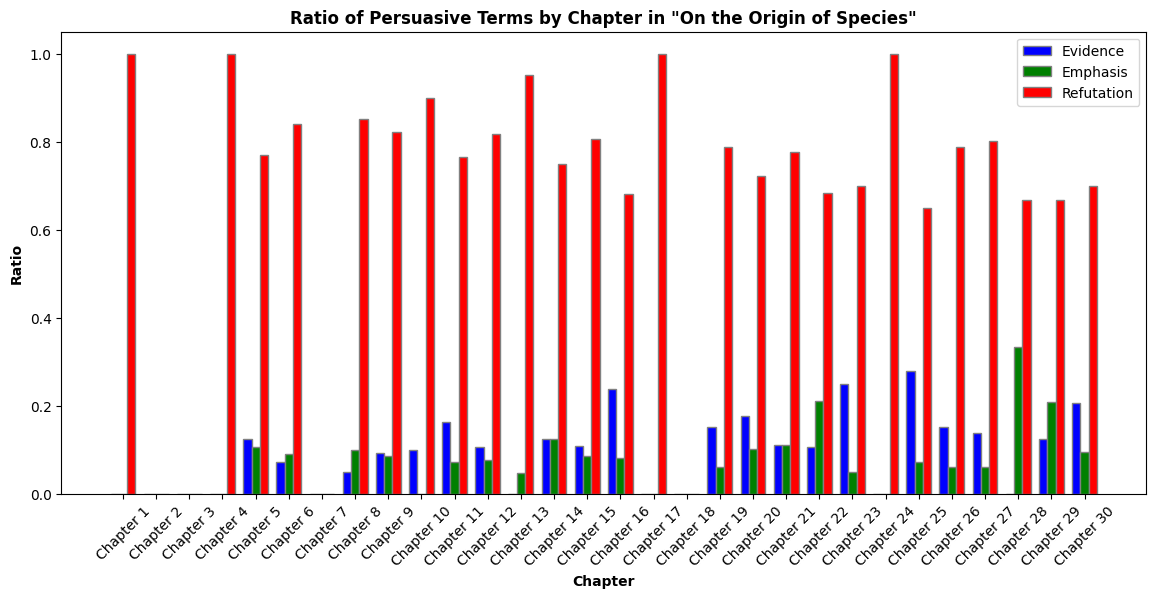

In [89]:
import matplotlib.pyplot as plt
import numpy as np

# Define chapter numbers as x-axis labels
chapters = np.arange(1, len(evidence_ratios) + 1)

# Width of each bar
bar_width = 0.25

# Positions for the bars
r1 = np.arange(len(chapters))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting grouped bars
plt.figure(figsize=(14, 6))
plt.bar(r1, evidence_ratios, color='b', width=bar_width, edgecolor='grey', label='Evidence')
plt.bar(r2, emphasis_ratios, color='g', width=bar_width, edgecolor='grey', label='Emphasis')
plt.bar(r3, refutation_ratios, color='r', width=bar_width, edgecolor='grey', label='Refutation')

# Adding labels and title
plt.xlabel('Chapter', fontweight='bold')
plt.ylabel('Ratio', fontweight='bold')
plt.title('Ratio of Persuasive Terms by Chapter in "On the Origin of Species"', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(chapters))], [f"Chapter {i}" for i in chapters], rotation=45)
plt.legend()

plt.show()


### **Conclusion**

Through this project, I examined Charles Darwin's use of persuasive language in On the Origin of Species by analyzing the frequency and distribution of key terms related to evidence, emphasis, and refutation across the text. By calculating the ratios of these terms in each chapter, I identified several important patterns in Darwin's rhetorical strategies.

To fulfill the project objective of practicing text processing, I employed a range of techniques. I began by importing and cleaning the text data, including converting the text to lowercase, removing punctuation, and standardizing the content using regular expressions. I then utilized text extraction methods to identify specific sections for analysis and applied frequency analysis to count the occurrences of persuasive terms. By calculating ratios of these terms for each chapter, I practiced advanced text processing skills such as text segmentation, term frequency calculation, and ratio analysis.

The analysis revealed that Darwin frequently uses refutation terms, particularly in chapters where he anticipates counterarguments or challenges to his theory. This indicates a deliberate strategy to address potential criticisms and strengthen his arguments for natural selection. The frequent use of refutation terms, such as "however" and "but," suggests that Darwin is often engaging with alternative viewpoints, acknowledging their validity, and then systematically countering them.

Chapters with higher ratios of evidence-based terms suggest that Darwin strategically introduces empirical data, observations, and factual arguments at key points in his text to build credibility and support his claims. These chapters often coincide with sections where new concepts are introduced or where he aims to reinforce the validity of his theory.

The emphasis terms, though used less frequently, highlight moments where Darwin seeks to underscore or clarify specific points, making his arguments appear more compelling and self-evident. These terms are often interspersed throughout the text to ensure that critical arguments stand out and resonate with readers.

Overall, this project provided valuable experience in various text processing techniques while offering insights into how Darwin carefully crafted his argumentation. The methods used—ranging from data cleaning and regular expressions to term frequency analysis—demonstrated effective approaches to processing and analyzing large textual datasets. This work has enhanced my skills in text processing, enabling a deeper understanding of how authors like Darwin use language strategically to communicate complex ideas and engage their audience.